# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
with open('/Users/valeriaastahova/Downloads/tom_1.txt', 'r') as f:
    text = f.read().lower() #делаем все буквы маленькими 
text = re.sub('[^а-я ]','', text) #удаляем лишние символы, включая пробелы (их можно и убирать, и оставлять)

In [3]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [4]:
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32,
 ' ': 33}

In [5]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

/Users/valeriaastahova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [8]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

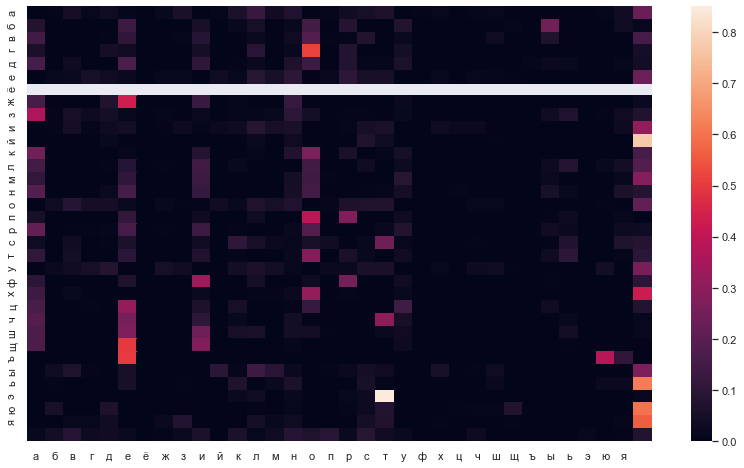

In [9]:
plt.figure(figsize=(14,8)) 
sns.heatmap(df) # рисуем тепловую карту 
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [10]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    if c != ' ': #исключаем пробелы
        for s in RUSSIAN:
            if s != ' ': #исключаем пробелы
                proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[s]] * probabilities[POS[s], end]
                if proba > 1.0e-05: #взяла значение побольше, чтобы исключить совсем маленькие вероятности 
                    print(''.join(['п', c, s, 'р']), proba)

пегр 1.289123450649265e-05
пепр 1.3070781235722301e-05
петр 1.0415979808014655e-05
побр 3.044931249563154e-05
повр 1.184036438186589e-05
погр 4.351228552163012e-05
подр 4.281177192917951e-05
поер 2.5982397849612053e-05
покр 1.1646684631571528e-05
попр 3.683359162997977e-05
потр 4.758472535974391e-05
пофр 1.4304379775441625e-05
прар 6.684419790935848e-05
прер 0.0001274229739682576
прир 1.3097851201096599e-05
прор 9.284334741372856e-05
прур 1.5373283774638692e-05


Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [11]:
start = POS['б']
word = 'б'
prev_letter = 'б'
for n in range(7):
    letter = 'а'
    prob = probabilities[POS[prev_letter], POS[letter]]
    for c in list(RUSSIAN):
        if c != ' ':
            if probabilities[POS[prev_letter], POS[c]] > prob:
                letter = c
                prob = probabilities[POS[prev_letter], POS[c]]
    word += letter
    prev_letter = letter
print(word)    

былалала


In [12]:
def word_generator(x, count):
    start = POS[x]
    word = x
    prev_letter = x
    for n in range(count):
        letter = 'а'
        prob = probabilities[POS[prev_letter], POS[letter]]
        for c in list(RUSSIAN):
            if c != ' ':
                if probabilities[POS[prev_letter], POS[c]] > prob:
                    letter = c
                    prob = probabilities[POS[prev_letter], POS[c]]
        word += letter
        prev_letter = letter
    print(word)    

In [13]:
word_generator('б', 8)

былалалал


# Комментарий 
Не очень поняла, правильно ли я выполнила задание. Если нам нужно сгенерировать реально существующее слово, то не очень правильно, потому что как тогда перезапустить цикл с игнорирование уже использованного варианта? 

-

Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [14]:
from hmmlearn.hmm import GaussianHMM
from warnings import filterwarnings 
filterwarnings('ignore')

In [15]:
series = pd.read_csv("/Users/valeriaastahova/Desktop/Машинное обучение Нетология/Датасеты/Временные ряды/Series/weekly-closings-of-the-dowjones-.csv")

In [16]:
series = series['Close']

In [17]:
values = series.values.reshape(-1,1)

In [18]:
for n in range(1, 10): 
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620555
3 -786.837533266772
4 -752.0201472668971
5 -737.1181370072993
6 -729.5671112589429
7 -713.7233991716992
8 -702.1057754508212
9 -690.9838068209648


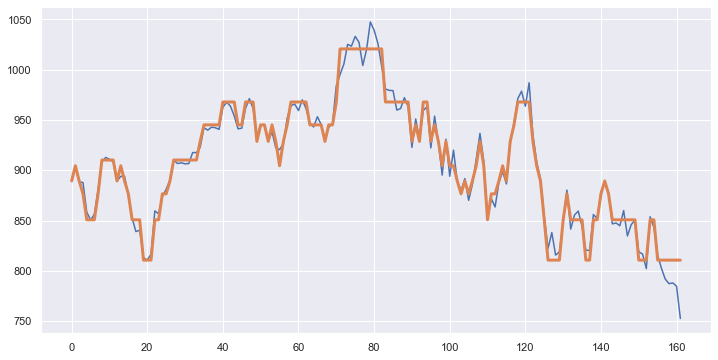

In [19]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values) #предсказываем, какое значение к какому состоянию относится 
means = np.zeros_like(values) #создаем нулевой вектор размером с вектор значений
for i in range(model.n_components):
    means[labels == i] = model.means_[i] #в значения вектора записываем среднее значение для наших меток 
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)